# <p style="background-color:pink;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>NLP - WORD2VEC  </b></p>
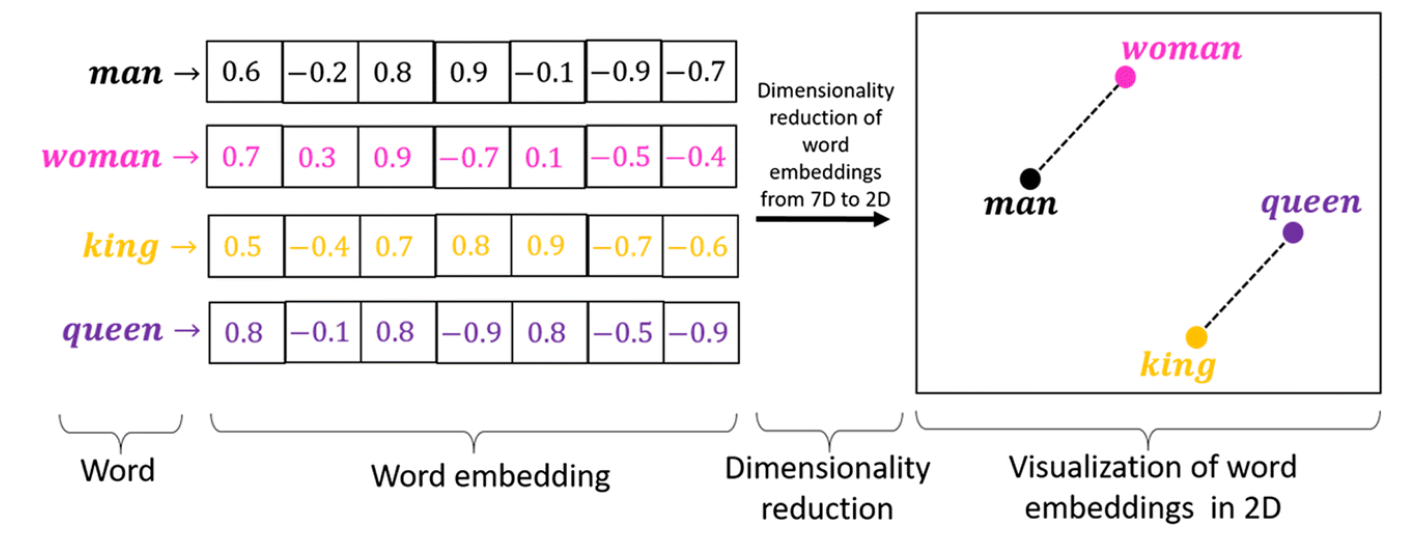
[Mywebsite] (https://www.yagmurana.info/) |           
[YouTube] (https://www.youtube.com/@NazlnazanAvc) |          
[LinkedIn] (https://www.linkedin.com/in/nazl%C4%B1-nazli-avci/ ) |      
[Github]  (https://github.com/avcinazlinazan) <br>

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [7]:
print(corpus[10:20])

[['fanatik', 'binicilik', 'tutkunu', 'olan', 'hamaney', 'den', 'fazla', 'cins', 'ata', 'sahip'], ['görkemli', 'cübbesi', 'ise', 'özel', 'olarak', 'yetiştirilen', 'develerin', 'tüyünden', 'dokunuyor'], ['anlatılanlar', 'arasında', 'en', 'ilginci', 'ali', 'hamaney', 'in', 'sık', 'sık', 'geçirdiği', 'depresyon', 'nöbetlerini', 'orta', 'kademe', 'bir', 'din', 'adamına', 'müstehcen', 'fıkralar', 'anlattırarak', 'atlattığı', 'iddiası'], ['eski', 'korumanın', 'sözlerinin', 'doğruluğuna', 'ise', 'hamaney', 'in', 'afyon', 'kullandığı', 'yolundaki', 'söylentileri', 'yalanlaması', 'kanıt', 'gösteriliyor'], ['yine', 'iran', 'dan', 'kaçan', 'istihbarat', 'görevlisinin', 'iddiaları', 'da', 'benzer', 'yönde'], ['bu', 'iddalara', 'göre', 'hamaney', 'in', 'avrupalı', 'fabrikatörlerle', 'afrikalı', 'cep', 'telefonu', 'şirketleri', 've', 'uluslararası', 'emtia', 'pazarlarıyla', 'iş', 'bağlantıları', 'var'], ['iranlı', 'kaçak', 'istihbaratçılar', 'ayrıca', 'hamaney', 'e', 'tahsis', 'edilen', 'saray', 'old

In [11]:
from gensim.models import Word2Vec

# Örnek bir Word2Vec modeli
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

In [17]:
#pip install gensim==3.8.3

In [13]:
model.wv['ankara']

array([ 0.1156333 , -0.35820636, -0.413844  ,  0.18078566,  0.54863954,
        0.09968877, -0.33044192,  0.7269041 , -0.19858685, -0.31460124,
       -0.03090948, -0.3368931 , -0.09689618,  0.39190507, -0.25875664,
        0.3569068 ,  0.23835036, -0.516198  ,  0.35039744, -0.6024496 ,
       -0.17795096,  0.45056996,  0.6143028 , -0.45040157, -0.30754375,
        0.01660642, -0.28494138,  0.01957472, -0.24959427,  0.7121537 ,
        0.23466073,  0.1697558 , -0.13180076, -0.65286607,  0.14283067,
       -0.17286858, -0.29540518, -0.00130092,  0.12753384, -0.5397976 ,
        0.6505091 , -0.0602862 ,  0.3880203 , -0.35715765,  0.40503684,
        0.0571072 , -0.52994895, -0.08529419,  0.13699141,  0.01330127,
        0.11898623, -0.14208016,  0.23632483, -0.19049144, -0.05337815,
       -0.28909832, -0.04627491,  0.23458788, -0.40619093, -0.49223065,
        0.20218664,  0.15500438, -0.09175048,  0.20727968, -0.22630966,
        0.06914929,  0.22723003, -0.03496416, -0.24278843, -0.18

In [15]:
model.wv.most_similar('youtube')

[('twitter', 0.7676606774330139),
 ('paylaşım', 0.7433319687843323),
 ('facebook', 0.7281786799430847),
 ('twıtter', 0.7200906276702881),
 ('internetteki', 0.7066531181335449),
 ('yayınlandıktan', 0.7062932252883911),
 ('whatsapp', 0.7030494213104248),
 ('video', 0.6971951127052307),
 ('weibo', 0.6902563571929932),
 ('etiketiyle', 0.6859226226806641)]

In [19]:
model.save('word2vec.model')

In [21]:
model = Word2Vec.load('word2vec.model')

In [23]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def closestwords_tsneplot(model, word):
    # Vektör ve etiketleri başlat
    word_vectors = []
    word_labels = [word]

    # En yakın kelimeleri al
    close_words = model.wv.most_similar(word)

    # Hedef kelimenin vektörünü ekle
    word_vectors.append(model.wv[word])

    # En yakın kelimelerin vektörlerini ve etiketlerini ekle
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors.append(model.wv[w])

    # Numpy array'e dönüştür
    word_vectors = np.array(word_vectors)

    # TSNE ile boyut indirgeme
    tsne = TSNE(random_state=0, perplexity=min(5, len(word_vectors) - 1))
    Y = tsne.fit_transform(word_vectors)

    # Koordinatları ayır
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # Scatter plot oluştur
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, alpha=0.7)

    # Her kelimeyi grafik üzerinde göster
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points', fontsize=9)

    plt.title(f"TSNE Plot for '{word}' and its Closest Words")
    plt.xlabel("TSNE Dimension 1")
    plt.ylabel("TSNE Dimension 2")
    plt.grid(True)
    plt.show()


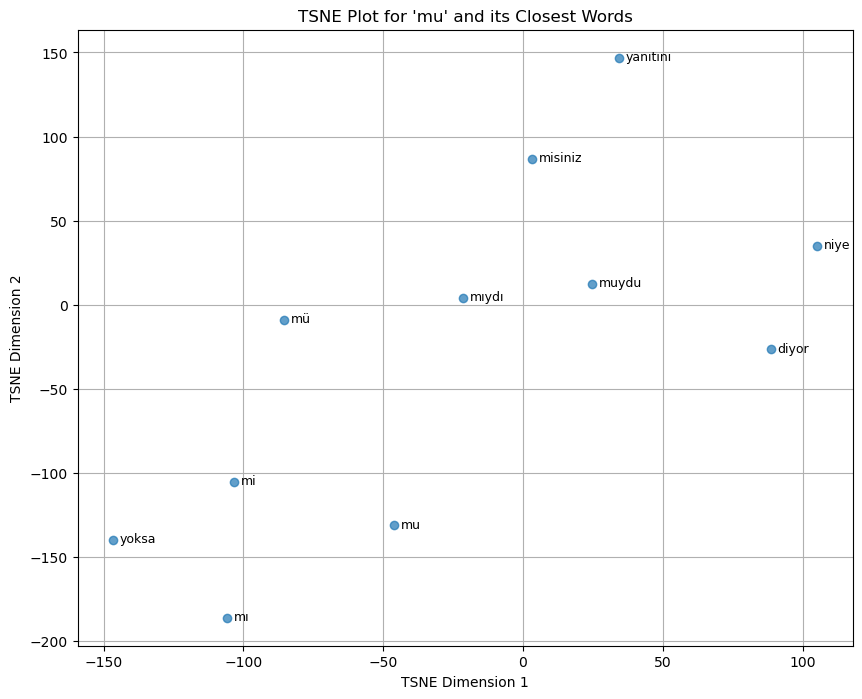

In [33]:
closestwords_tsneplot(model, 'mu')